Homework 1 due by October 31st at 11:59 pm
Due Oct 24 by 11:59pm Points 10 Submitting a file upload File Types ipynb Available Oct 17 at 12am - Oct 31 at 11:59pm 15 days

Instructions: Have all the code for all the questions in one Jupyter notebook and upload
the file at the time of submission. I will only consider these this file format for grading.
So, after you uploaded the file, check the file extension and if it is not an ipynb,
then upload the right file.


Way to present:

#Solution 1 to indicate solution to question 1. Please submit original work.

Go to

https://archive.ics.uci.edu/ml/datasets/Air+Quality and download the Excel file. For this data set y is "RH" which is Relative Humidity.

Use Pandas to perform the following:

1) Read the Excel file and create a dataframe

2) Find the number of columns and rows

3) Print the first 5 rows of the dataframe

4) Find the data type of the columns

5) Find the missing values in the column and replace them with the mean of the column

6) Find the correlation between features. 

7) Train the model without dropping relevant chemical columns by performing multilinear regression. 

8) Then train the model features that are least correlated. Find the mean squared and r-squared errors for the training and test.

In [55]:
from zipfile import ZipFile
from urllib.request import urlopen   
import xlrd as xl
import os
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Q1) Read the Excel file and create a dataframe

In [56]:
#Solution 1
raw_df = pd.read_excel('AirQualityUCI.xlsx', na_values = '-200')
print(type(raw_df))

<class 'pandas.core.frame.DataFrame'>


Q2) Find the number of columns and rows

In [57]:
#Solution 2
x_row, x_col = raw_df.shape
print('DataFrame as {0} Rows and {1} Columns'.format(x_row, x_col))

DataFrame as 9357 Rows and 15 Columns


Q3) Print the first 5 rows of the dataframe

In [58]:
#Solution 3
print(raw_df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

Q4) Find the data type of the columns

In [59]:
#Solution 4
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB
None


Q5) Find the missing values in the column and replace them with the mean of the column

In [60]:
#raw_df.replace(-200, np.NaN, inplace = True)
print("Before Null Replacement\n", raw_df.isna().sum())
print('\n')
raw_df = raw_df.groupby(raw_df.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

print("After Null Replacement\n",raw_df.isna().sum())

Before Null Replacement
 Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)            0
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


After Null Replacement
 Date               0
Time               0
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH               366
dtype: int64


In [61]:
print(raw_df.AH.isna().sum())
raw_df.fillna(raw_df.AH.mean(), inplace = True)
print(raw_df.AH.isna().sum())

366
0


6) Find the correlation between features. 

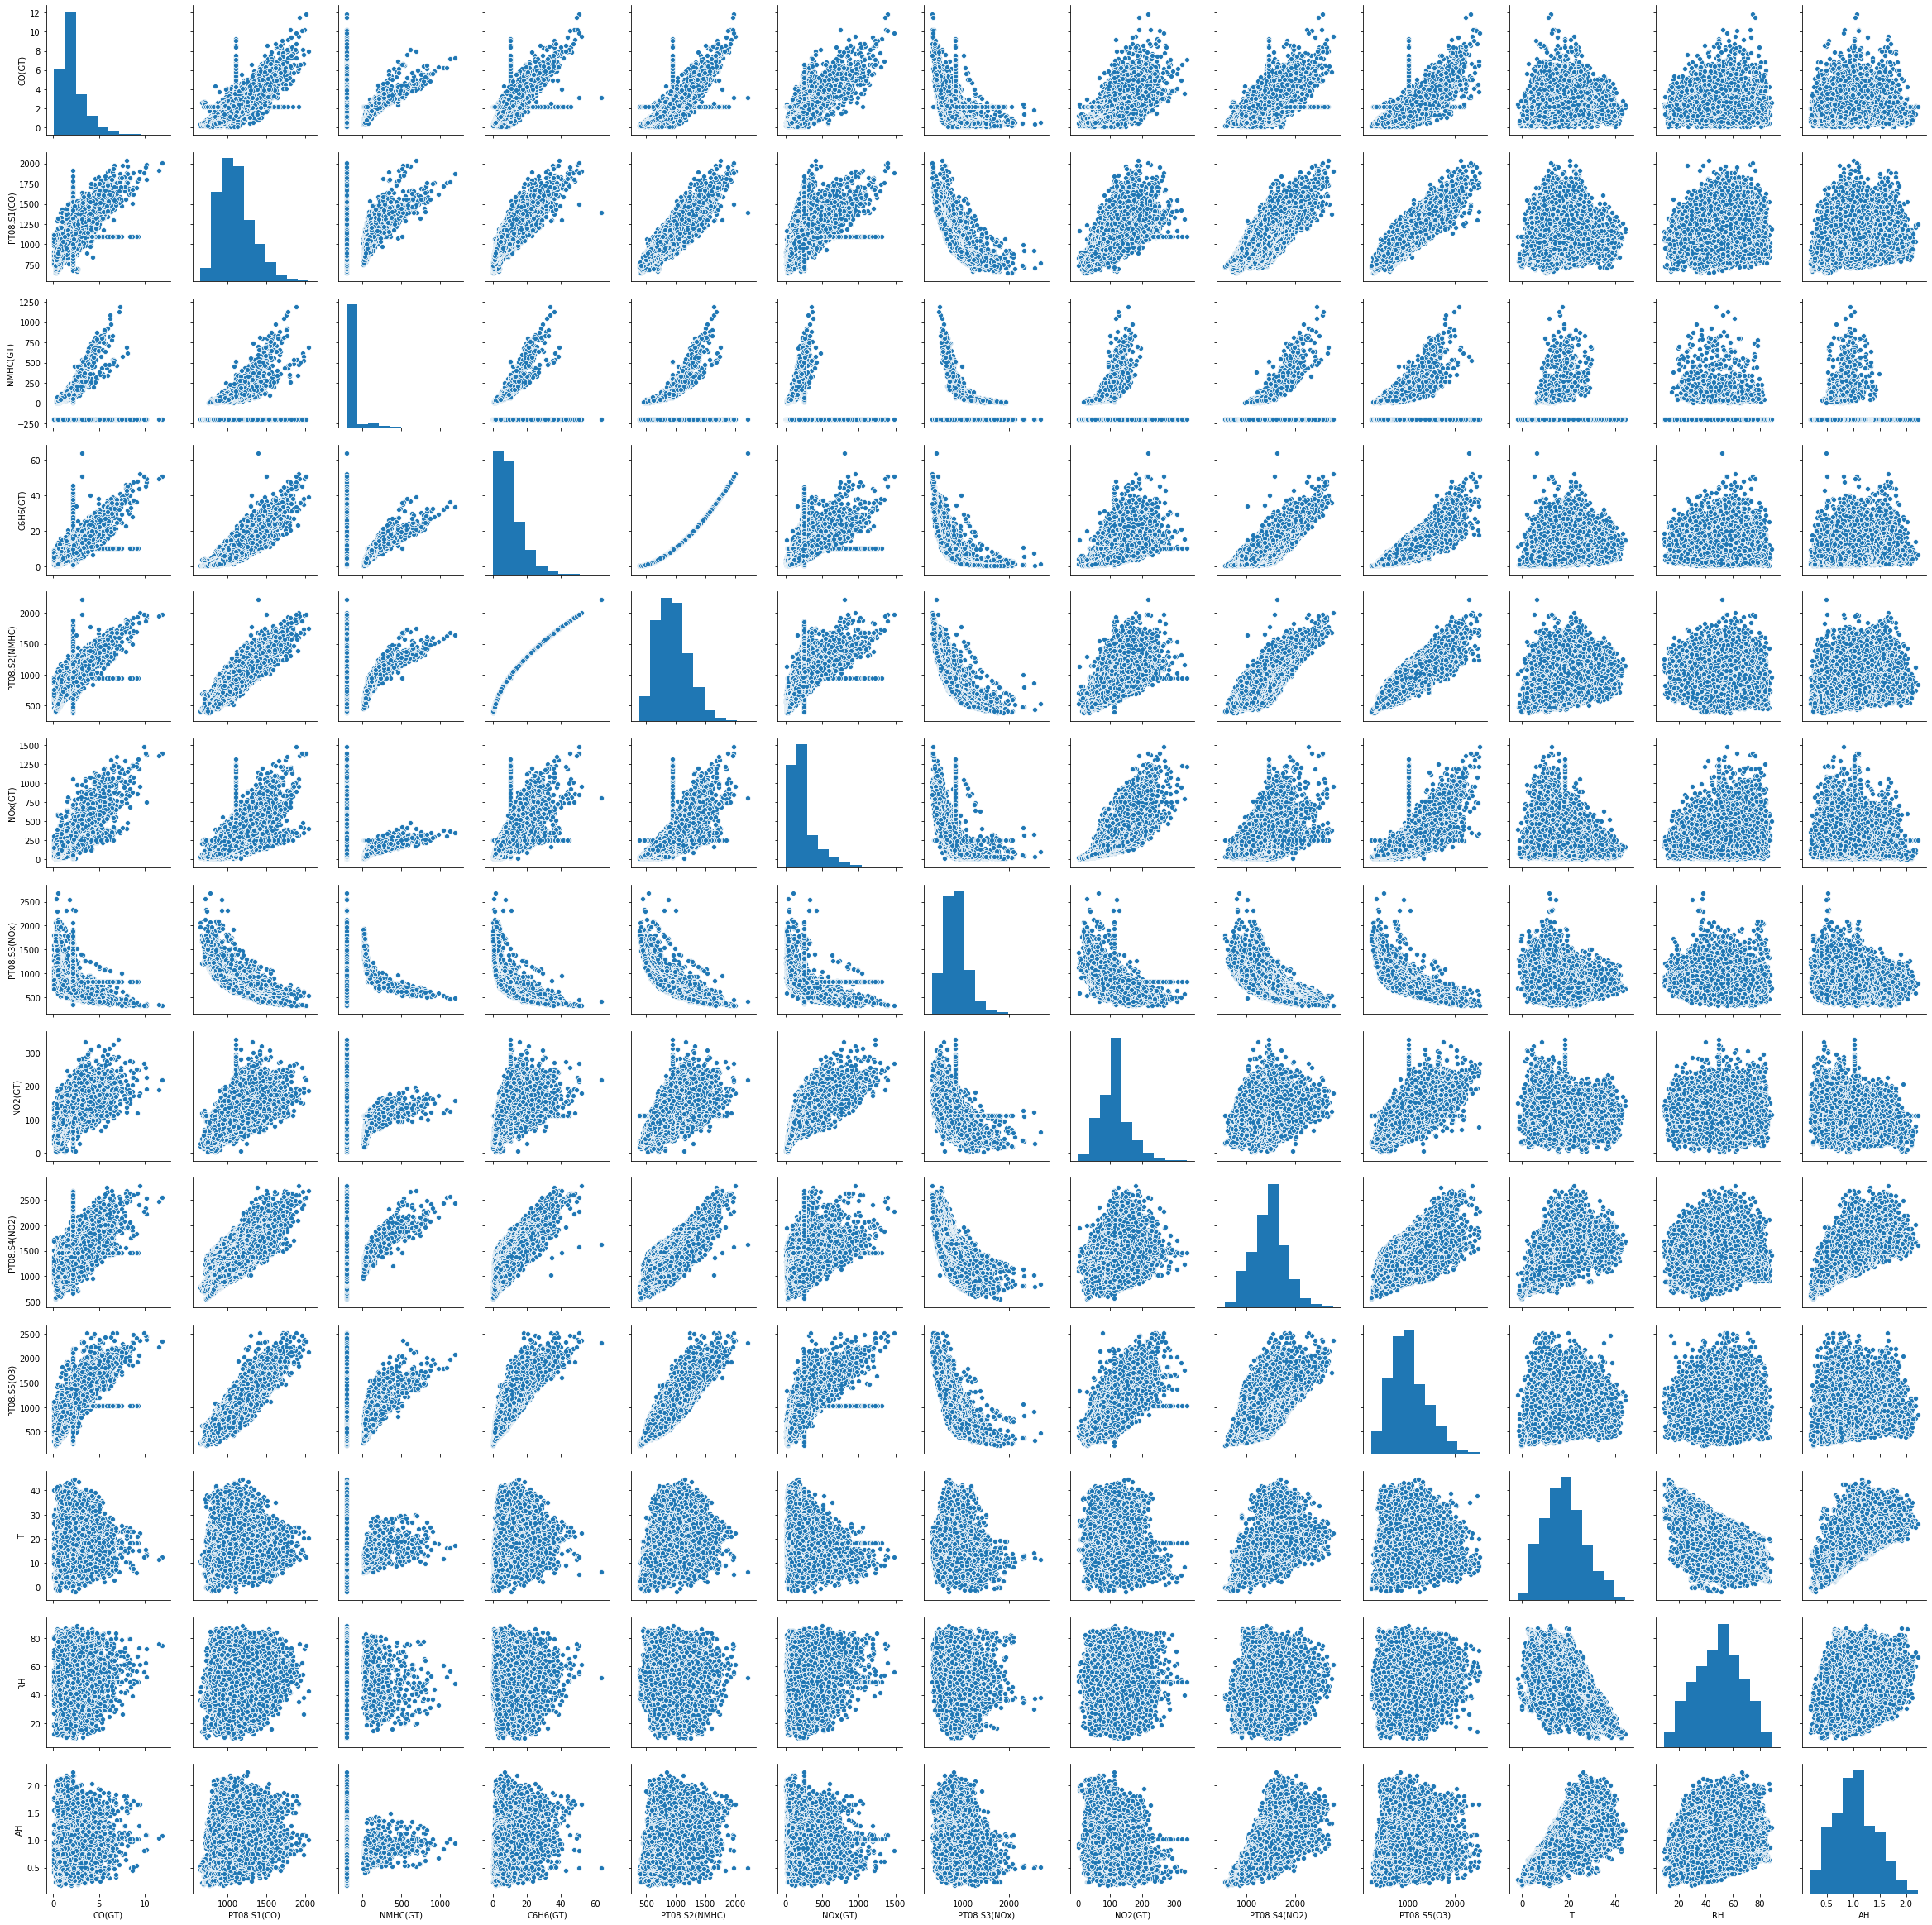

In [62]:
# Solution 6 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(raw_df)
plt.show()

In [63]:
corr = raw_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1,0.773394,0.162967,0.812392,0.795586,0.762297,-0.61387,0.646528,0.558225,0.759027,0.0202604,0.0432035,0.0432726
PT08.S1(CO),0.773394,1,0.24723,0.883821,0.892972,0.615974,-0.771918,0.562997,0.682874,0.899326,0.0486276,0.114607,0.135323
NMHC(GT),0.162967,0.24723,1,0.134891,0.13249,-0.107788,0.0515001,-0.0164369,0.210969,0.110029,-0.0672064,-0.0141071,-0.122019
C6H6(GT),0.812392,0.883821,0.134891,1,0.981962,0.61688,-0.735711,0.536178,0.765717,0.865727,0.198891,-0.0616435,0.167909
PT08.S2(NMHC),0.795586,0.892972,0.13249,0.981962,1,0.601812,-0.796687,0.561421,0.777235,0.88059,0.24133,-0.0903517,0.186906
NOx(GT),0.762297,0.615974,-0.107788,0.61688,0.601812,1,-0.563259,0.763133,0.205526,0.688214,-0.235657,0.192578,-0.126831
PT08.S3(NOx),-0.61387,-0.771918,0.0515001,-0.735711,-0.796687,-0.563259,1,-0.569535,-0.53846,-0.796554,-0.145133,-0.0567298,-0.232021
NO2(GT),0.646528,0.562997,-0.0164369,0.536178,0.561421,0.763133,-0.569535,1,0.14094,0.629564,-0.165317,-0.0806447,-0.2912
PT08.S4(NO2),0.558225,0.682874,0.210969,0.765717,0.777235,0.205526,-0.53846,0.14094,1,0.591137,0.561333,-0.0321881,0.629644
PT08.S5(O3),0.759027,0.899326,0.110029,0.865727,0.88059,0.688214,-0.796554,0.629564,0.591137,1,-0.0271934,0.124952,0.070738


In [64]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Q8) Train the model without dropping relevant chemical columns by performing multilinear regression. 

In [65]:
#raw_df.plot(figsize=(18,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21e291d0>,
      dtype=object)

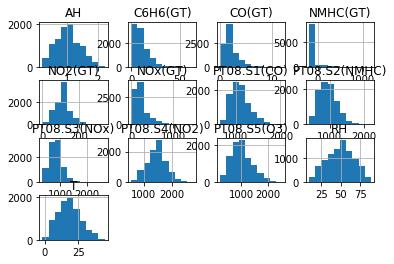

In [66]:
raw_df.hist()

std_dev = 3
dfk = raw_df[(np.abs(stats.zscore(raw_df)) < float(std_dev)).all(axis=1)]
dfk.plot(figsize=(18,5))

from scipy import stats
std_dev = 3
df1 = raw_df[(np.abs(stats.zscore(raw_df)) < float(std_dev)).all(axis=1)]
df1.plot(figsize=(18,5))

In [67]:
raw_df['NMHC(GT)'] = raw_df['NMHC(GT)'].values.astype(float)
#raw_df['Date] = raw_df['Date'].values.astype(float)
#raw_df.Time.apply(lambda x:((x.hour*60+x.minute)*60+x.second)/60)
#raw_df['Time'] = pd.to_numeric(raw_df['Time'], errors='coerce')
#raw_df['Time'] = raw_df['Time'].values.astype(float)
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 1.1+ MB
None


In [68]:
X = raw_df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T']] 
y = raw_df['RH']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [70]:
# with sklearn
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 74.12057994002973
Coefficients: 
 [-1.13990314e+00  1.18269458e-02 -1.55944660e-02 -5.80255968e-01
 -6.30528664e-02  3.81751167e-02 -2.44779874e-02 -1.22162094e-01
  5.84029352e-02  1.55933472e-03 -1.89084293e+00]


In [72]:
yhat = reg.predict(x_test)
print(yhat[0])

44.618044952205764


In [73]:
#mean squared error
np.mean((yhat-y_test)**2)

59.95613556943029

In [74]:
#rSquare Error
print(y_test.loc[[0]])
print("rSquare Error\n", (np.mean(yhat-y_test)**2)/np.mean(y_test))

0    48.875001
Name: RH, dtype: float64
rSquare Error
 0.0004719230608535119


8) Then train the model features that are least correlated. Find the mean squared and r-squared errors for the training and test.

In [75]:
#Solution 8

In [76]:
def lin_reg(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    # with sklearn
    reg = linear_model.LinearRegression()
    reg.fit(x_train, y_train)
    print('Intercept: \n', reg.intercept_)
    print('Coefficients: \n', reg.coef_)
    yhat = reg.predict(x_test)
    print(yhat[0])
    #mean squared error
    mean_square_eror = np.mean((yhat-y_test)**2)
    print(mean_square_eror)
    #rSquare Error
    print(y_test.loc[[0]])
    r_square_eror = (np.mean(yhat-y_test)**2)/np.mean(y_test)
    print("rSquare Error\n", r_square_eror)

In [77]:
X1 = raw_df[['CO(GT)']] 
y1 = raw_df['NMHC(GT)']

lin_reg(X1, y1)

Intercept: 
 -196.26355604833128
Coefficients: 
 [16.83057165]
-174.38381290226653
21305.7643348479
0    150.0
Name: NMHC(GT), dtype: float64
rSquare Error
 -0.14269815138868963


In [78]:
X11 = raw_df[['CO(GT)']] 
y11 = raw_df['RH']

lin_reg(X11, y11)

Intercept: 
 48.259674771667605
Coefficients: 
 [0.52062604]
48.936488622930995
287.54769504830006
0    48.875001
Name: RH, dtype: float64
rSquare Error
 0.01126394048771507


In [79]:
X2 = raw_df[['CO(GT)']] 
y2 = raw_df['T']

lin_reg(X2, y2)

Intercept: 
 18.026714748143807
Coefficients: 
 [0.11128204]
18.171381405876303
76.60501825187637
0    13.6
Name: T, dtype: float64
rSquare Error
 0.0033432546353364566


In [80]:
X22 = raw_df[['T']] 
y22 = raw_df['RH']

lin_reg(X22, y22)

Intercept: 
 70.08059555412453
Coefficients: 
 [-1.13331869]
40.670975239001564
189.05879283565304
0    48.875001
Name: RH, dtype: float64
rSquare Error
 0.004188797839908812


In [81]:
X3 = raw_df[['NMHC(GT)']] 
y3 = raw_df['PT08.S2(NMHC)']

lin_reg(X3, y3)

Intercept: 
 977.8796729517591
Coefficients: 
 [0.24414159]
929.0513558979858
67261.54407027469
0    1045.5
Name: PT08.S2(NMHC), dtype: float64
rSquare Error
 2.6369783839404047e-06


In [82]:
X4 = raw_df[['NOx(GT)']] 
y4 = raw_df['PT08.S2(NMHC)']

lin_reg(X4, y4)

Intercept: 
 738.456474778204
Coefficients: 
 [0.8092678]
823.4295936203512
43326.40900131286
0    1045.5
Name: PT08.S2(NMHC), dtype: float64
rSquare Error
 0.01615833069990299
